In [2]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [4]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100.0%


Extracting ./MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



102.8%


Extracting ./MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100.0%


Extracting ./MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



112.7%
c:\users\graufrd\appdata\local\programs\python\python39\lib\site-packages\torchvision\datasets\mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting ./MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST\raw

Processing...
Done!


In [5]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

c:\users\graufrd\appdata\local\programs\python\python39\lib\site-packages\torchvision\datasets\mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
c:\users\graufrd\appdata\local\programs\python\python39\lib\site-packages\torchvision\datasets\mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
c:\users\graufrd\appdata\local\programs\python\python39\lib\site-packages\torchvision\datasets\mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
c:\users\graufrd\appdata\local\programs\python\python39\lib\site-packages\torchvision\datasets\mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


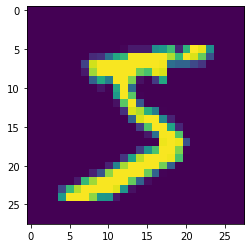

In [13]:
plt.imshow(X_train[0, :, :])
plt.show()

In [37]:
X_train = X_train.float()
X_test = X_test.float()

In [38]:

X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [39]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(100)

In [40]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [41]:

batch_size = 100

for epoch in range(10000):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes] #.to(device)
        y_batch = y_train[batch_indexes] #.to(device)
        
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()

    print(accuracy)

tensor(0.9090)
tensor(0.9157)
tensor(0.9198)
tensor(0.9259)
tensor(0.9269)
tensor(0.9327)
tensor(0.9262)
tensor(0.9285)
tensor(0.9330)
tensor(0.9341)
tensor(0.9377)
tensor(0.9373)
tensor(0.9373)
tensor(0.9399)
tensor(0.9342)
tensor(0.9395)
tensor(0.9392)
tensor(0.9402)
tensor(0.9388)
tensor(0.9407)
tensor(0.9436)
tensor(0.9412)
tensor(0.9420)
tensor(0.9445)
tensor(0.9413)
tensor(0.9447)
tensor(0.9444)
tensor(0.9439)
tensor(0.9467)
tensor(0.9443)
tensor(0.9490)
tensor(0.9445)
tensor(0.9465)
tensor(0.9485)
tensor(0.9478)
tensor(0.9469)
tensor(0.9513)
tensor(0.9510)
tensor(0.9481)
tensor(0.9480)
tensor(0.9496)
tensor(0.9440)
tensor(0.9514)
tensor(0.9518)
tensor(0.9468)
tensor(0.9500)
tensor(0.9491)
tensor(0.9509)
tensor(0.9487)
tensor(0.9490)
tensor(0.9509)
tensor(0.9532)
tensor(0.9493)
tensor(0.9525)
tensor(0.9519)
tensor(0.9511)
tensor(0.9537)
tensor(0.9512)
tensor(0.9523)


KeyboardInterrupt: 